<a href="https://colab.research.google.com/github/Itiel-z/BIA-Projects/blob/main/Project_4/Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 4 - Itiel

In [38]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [39]:
# Load MNIST dataset from Scikit-learn
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data/255.0
y = mnist.target

In [ ]:
# Basic data exploration
print(f"Dataset shape: {X.shape}")
print(f"Labels shape: {y.shape}")

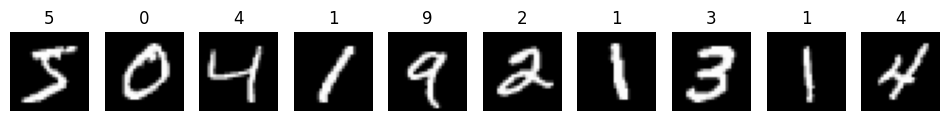

In [40]:
# Sample the data
np.random.seed(42)
rnd_sample = np.random.choice(np.arange(len(X)), 10000, replace=False)
X_sample = X.iloc[rnd_sample]
y_sample = y.iloc[rnd_sample]

# Show 10 random digits
fig, axes = plt.subplots(1, 10, figsize=(12, 4))
for i, ax in enumerate(axes):
    ax.imshow(X.values[i].reshape(28, 28), cmap='gray')
    ax.set_title(y.values[i])
    ax.axis('off')
plt.show()

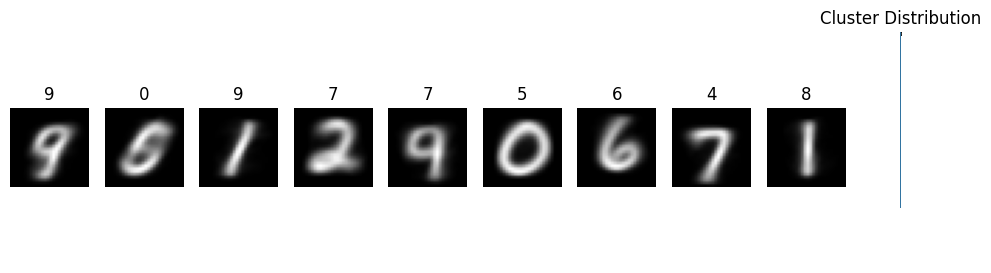

In [41]:
# Apply KMeans clustering with 10 clusters as this dataset has 10 digits
kmeans = KMeans(n_clusters=10, random_state=42)
X_clustered = kmeans.fit_predict(X_sample)

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for i, ax in enumerate(axes):
    ax.imshow(kmeans.cluster_centers_[i].reshape(28, 28), cmap='gray')
    ax.set_title(X_clustered[i])
    ax.axis('off')
sns.countplot(x=X_clustered)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

New instance of cluster assignments [10  1 10  8  8  6  7  5  9  5  3  5  5 10  4]


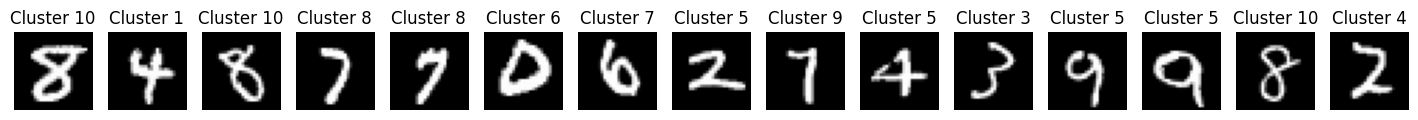

In [42]:
# Predict clusters for a new sample set
new_X = X.sample(15, random_state=42)
new_clusters = kmeans.predict(new_X)
print("New instance of cluster assignments", new_clusters+1)

fig, ax = plt.subplots(1, 15, figsize=(18, 3))
for i, idx in enumerate(new_X.index):
    ax[i].imshow(X_sample.loc[idx].values.reshape(28, 28), cmap='gray')
    ax[i].set_title(f"Cluster {new_clusters[i]+1}")
    ax[i].axis('off')

In [43]:
# Evaluate with Silhouette Score
score = silhouette_score(X_sample, X_clustered)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.0538


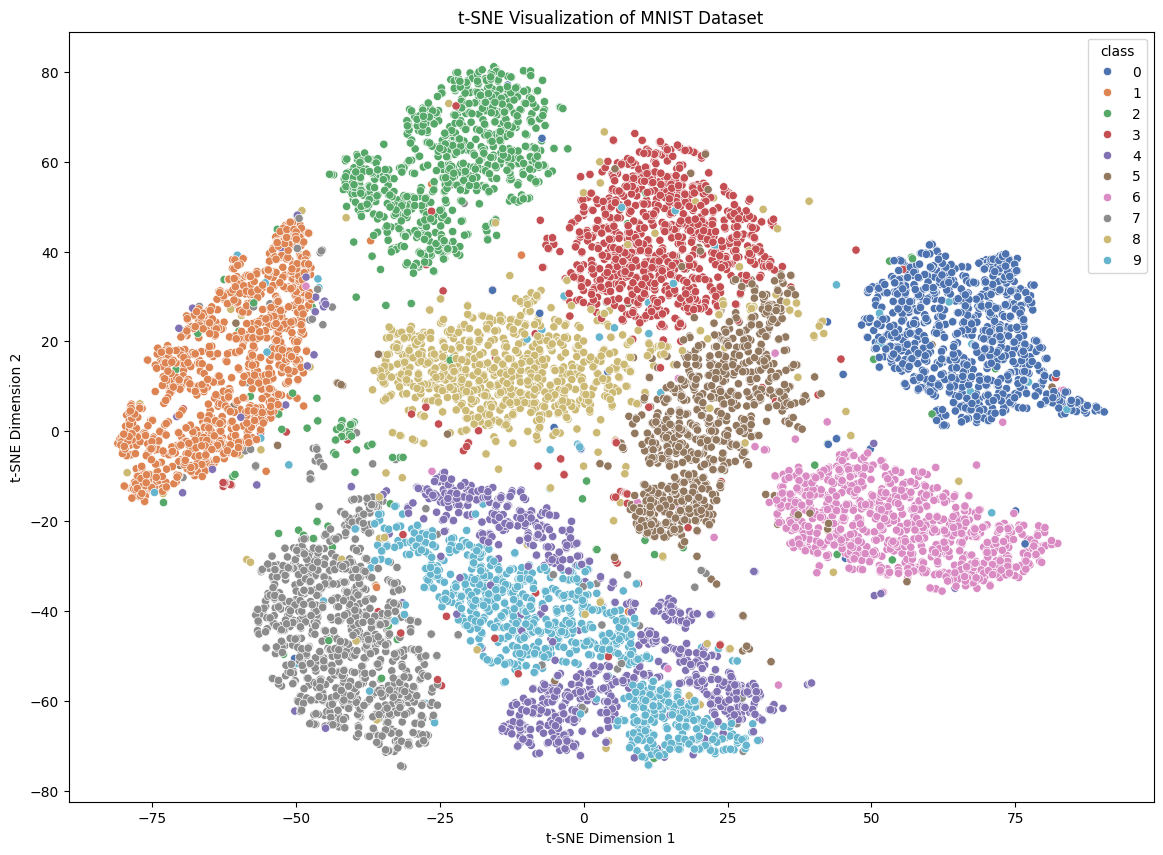

In [47]:
# Dimensionality reduction and visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_sample)

plt.figure(figsize=(14, 10))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_sample, palette='deep')
plt.title('t-SNE Visualization of MNIST Dataset')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

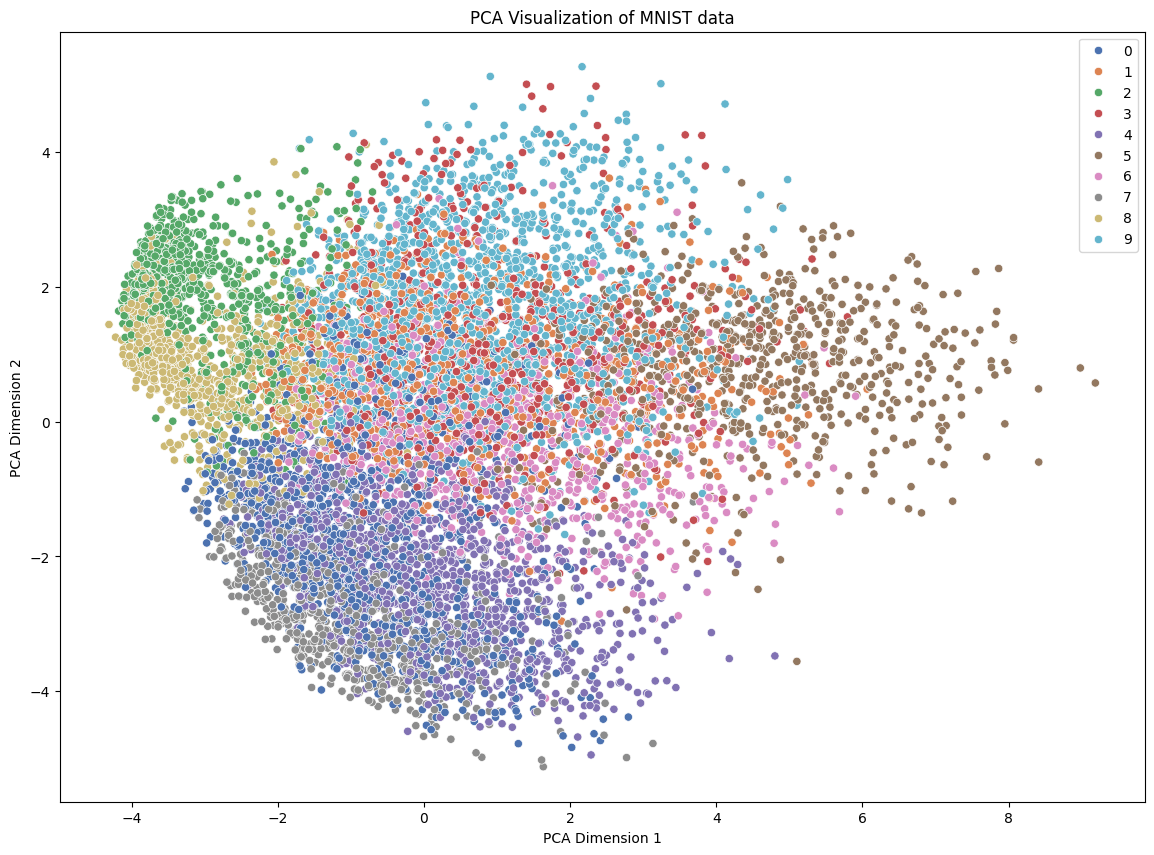

In [53]:
# Dimensionality reduction and visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_sample)
plt.figure(figsize=(14, 10))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=X_clustered, palette='deep', legend='full')
plt.title('PCA Visualization of MNIST data')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.show()